# Solwing the Solow model with R&D

## Intro

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import time
from scipy import linalg
from scipy import optimize
import sympy as sm

from scipy import sparse
import scipy.sparse.linalg

sm.init_printing(use_unicode=True)

We consider the following model for a closed economy, where the following equations are given:

1. \\[Y_{t}=K_{t}^{\alpha}\left(A_{t}L_{Y_{t}}\right)^{1-\alpha}, 0<\alpha<1\\]
2. \\[K_{t+1}-K_{t}=s_{K}Y_{t}-\delta K_{t},0<\delta<1,0<s_{k}<1,K_{0}>0  \text{ provided} \\] 
3. \\[A_{t+1}-A_{t}=\rho A_{t}^{\phi}L_{A_{t}}^{\lambda},\rho>0,\phi>0,0<\lambda<1 \\]
4. \\[L_{A_{t}}=s_{R}L_{t},0<s_{R}<1 \\]
5. \\[L_{t}=L_{A_{t}}+L_{Y_{t}} \\]
6. \\[L_{t+1}=\left(1+n\right)L_{t},n>0 \\]


Equation (1) is a Cobb-Douglas production function, which describes the aggregated production, $Y_{t}$, as a function of financial capital, $K_{t}$, production workers, $L_{Y_{t}}$ and the knowledge level, $A_{t}$, which determines the productivity of the workers.

Equation (2) describes how financial capital develops over time, where $s_{K}$ is the saving rate.

Equation (3) shows the development in the knowledge level, where $A_{t}$ is an expression for the knowledge at the time $t$ and $L_{A_{t}}$ is the amount of researchers. Equation (4) shows that the latter is the product of the population, $L_{t}$, and the share of researchers, $s_{R}$.

The following definitions will also be used throughout this project:

7. \\[ y_{t}=\frac{Y_{t}}{L_{Y_{t}}};k_{t}=\frac{K_{t}}{L_{Y_{t}}} \\]
8. \\[\tilde{y}=\frac{y_{t}}{A_{t}};\tilde{k}=\frac{k_{t}}{A_{t}} \\]

Where **7.** is the definition for capital-labo ratio and **8.** is the definition for the technology adjusted capital-labor ratio.


# The growth in technology
Our first goal in this model is to find the steady state rate for the exact growth rate of technology.

The following transitions equation is given for the growth in technology:

\\[g_{t+1}=\left(1+n\right)^{\lambda}g_{t}\left(1+g_{t}\right)^{\phi-1}\\]

We then wish to find the steady state for this equation. That is to solve for $g^*$ the following equation:
\\[g^*=\left(1+n\right)^{\lambda}g^*\left(1+g^*\right)^{\phi-1}\\]

In [2]:
# Define the following symbols
g = sm.symbols('g')
n = sm.symbols('n')
l = sm.symbols('lambda')
phi = sm.symbols('phi')

In [3]:
# Define the transition equation
ss_g = sm.Eq(1,(1+n)**(l)*1*(1+g)**(phi-1))
ss_g

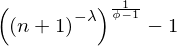

In [4]:
# Solve for g
kss_g = sm.solve(ss_g,g)[0]
kss_g

Next we will estimate the numeric value of the steady state growth rate of technology by using realistic parameters.
$n = 0.01$
$\lambda = 1$
$\phi = 0.51$


In [5]:
sol_func_g = sm.lambdify((n,l,phi),kss_g)
sol_g = sol_func_g(0.01,1,0.5)
f"The steady state growth rate of technology is {sol_g:.2f}"

'The steady state growth rate of technology is 0.02'

# Solving the "simple" model with R&D

The transition equation can then be expressed as:

\\[ {\tilde{k}_{t+1}=\frac{1}{\left(1+n\right)\left(1+g_{t}\right)}\left(s_{k}\tilde{k}_{t}^{\alpha}+\left(1-\delta\right)\tilde{k}_{t}\right)} \\]



Løs transligning find steady state og illustrer

To find the solution for this model, we will have to find the steady state rate. That is to solve the following equation:

78. \\[{\tilde{k}^{*}=\frac{1}{\left(1+n\right)\left(1+g_{t}\right)}\left(s_{k}\tilde{k}^{\alpha*}+\left(1-\delta\right)\tilde{k}^{*}\right)} \\]

In [6]:
k = sm.symbols('k')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
s_k = sm.symbols('s_K')

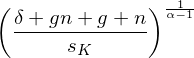

In [7]:
ss = sm.Eq(k,(s_k*k**alpha+(1-delta)*k)/((1+n)*(1+g)))
kss = sm.solve(ss,k)[0]
kss

In [8]:
sol_func = sm.lambdify((s_k,g,n,delta,alpha),kss)
sol_k = sol_func(0.2,0.02,0.01,0.06,1/3)
f"The steady state is {sol_k:.4f}"

'The steady state is 3.3017'

In [9]:
def ugh_this_bitch(k):
    return (s_k*k**alpha+(1-delta)*k)/((1+n)*(1+g))

In [10]:
import pylab

s_k = 0.2
g = 0.02
n = 0.01
delta = 0.06
alpha = 1/3


In [11]:
ugh_this_bitch(sol_k)

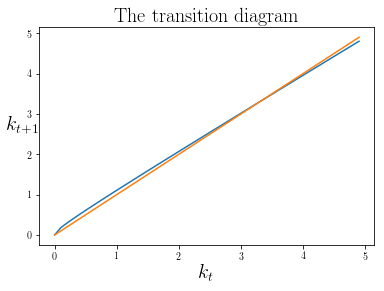

In [56]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
    

k = np.arange(0.0, 5.0, 0.1)

plt.xlabel(r'$k_t$',fontsize=20 )
plt.ylabel(r'$k_{t+1}$',rotation=0, fontsize=20)
plt.title(r'The transition diagram', fontsize=20)
plt.plot(k, ugh_this_bitch(k))
plt.plot(k, k)

       
       
       
       
plt.show()

# Extending the model with human capital

We now want to extend the model and therefore adds *Human capital*.

Equation 1. will be swapped by:

1'. \\[Y_{t}=K_{t}^{\alpha}H_{t}^{\varphi}\left(A_{t}L_{Y_{t}}\right)^{1-\alpha-\varphi} \\]

And a new human capital accumulation equation is given as:

7. \\[H_{t+1}-H_{t}=s_{H}Y_{t}-\delta H_{t},0<\delta<1,0<s_{H}<1,H_{0}>0  \text{ provided} \\] 



which will change equation (1) and (3). Additionally the equation below will be added to the model, which describes how human capital develops over time. Here $s_{H}$ is the saving rate in human capital. $\delta$ is the depreciation rate.
The following is the definition of per production worker variable and per effective production worker variable: $h_{t}=\frac{H_{t}}{L_{Y_{y}}}$ &  $\tilde{h}=\frac{h_{t}}{A_{t}}$

With human capital included in the model, a new transition equation is given for human capital per effecient worker and equation xx. will be swapped by xx'.

13. \\[ \tilde{h}_{t+1}=\frac{1}{\left(1+n\right)\left(1+g_{t}\right)}\left(s_{H}\tilde{k}_{t}^{\alpha}\tilde{h}_{t}^{\varphi}+\left(1-\delta\right)\tilde{h}_{t}\right) \\]

x''.\\[ \tilde{k}_{t+1}=\frac{1}{\left(1+n\right)\left(1+g_{t}\right)}\left(s_{H}\tilde{k}_{t}^{\alpha}\tilde{h}_{t}^{\varphi}+\left(1-\delta\right)\tilde{k}_{t}\right)\\]

The new steady state for this extended model can be found to be:

In [10]:
# Define more symbols
h = sm.symbols('h')
vphi = sm.symbols('varphi')
s_h =sm.symbols('s_H')

In [11]:
# Define the two new transition equations
ss_kk = sm.Eq(k,(s_k*k**alpha*h**vphi+(1-delta)*k)/((1+n)*(1+g)))
ss_hh = sm.Eq(h,(s_h*k**alpha*h**vphi+(1-delta)*h)/((1+n)*(1+g)))

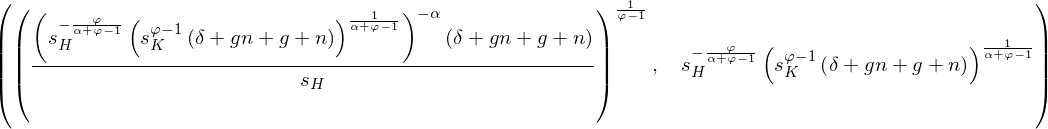

In [12]:
# Solve a system of two equations
kss_kh = sm.solve([ss_kk,ss_hh], (h,k))[0]
kss_kh

While this might not be the most aesthetically pleasing solution, it is the correct.
Next we are able to find the steady state for GDP per effecient worker, $\tilde{y}^* = (\tilde{k})^\alpha*(\tilde{h})^\varphi $.

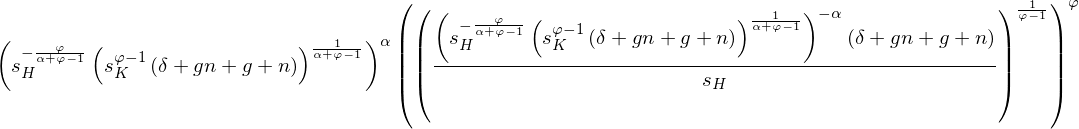

In [13]:
kss_kh[0]**vphi*kss_kh[1]**alpha

Next we will estimate the numeric value of the steady state of GDP per effecient worker. 

In [16]:
#Insert probable estimates

In [17]:
ss_test = sm.solve(ss_kk,k)[0]
ss_test

In [18]:
ss_hh2 = ss_hh.subs(k,ss_test)

In [19]:
ss_dsad = sm.solve(ss_hh2,h)[0]

In [20]:
ss_dsad

In [21]:
ss_test.subs(h,ss_dsad)

# Finding the steady state growth path for GDP per capita

Under the assumption that $\phi < 1 $, we'll try to derive the steady-state growth path for GDP per capita. \\[\hat{y}_{t}^{*}=\tilde{y}^{*}\left(1-s_{R}\right)\left(\frac{\rho}{g_{se}}\right)^{\frac{1}{1-\phi}}s_{R}^{\frac{\lambda}{1-\phi}}\left(1+g_{se}\right)^{t}L_{0}^{\frac{\lambda}{1-\phi}}\\]

In [14]:
y_hat = sm.symbols('\hat{y}_{t}^{*}')
y_tilde = sm.symbols(r'\tilde{y}^{*}')
l = sm.symbols('lambda')
phi = sm.symbols('phi')
s_r = sm.symbols('s_{R}')
rho = sm.symbols('rho')
g_se = sm.symbols('g_{se}')
t = sm.symbols('t')
L_0 = sm.symbols('L_{0}')

In [15]:
# Defining the equation
ssgp = y_tilde*(1-s_r)*(rho/g_se)**(1/(1-phi))*s_r**(l/(1-phi))*(1+g_se)**t*L_0**(l/(1-phi))

Next we will find the "Golden rule" for $s_R$, which is the optimal share of the population being researchers. This is done by differentiation with respect to $s_R$,$\frac{\partial\hat{y}_{t}^{*}}{\partial s_{R}}$,  and then solving for $s_R$.

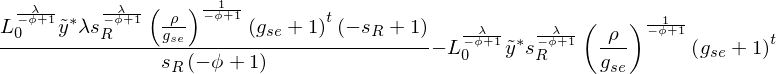

In [16]:
# Differentiate the equation with respect to s_R
diff_ssgp = sm.diff(ssgp,s_r)
diff_ssgp

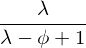

In [17]:
#Solve for s_R
golden_rule = sm.solve(diff_ssgp,s_r)[0]
golden_rule

As presented above, the optimal share of researchers is $\left[\frac{\lambda}{\lambda-\phi+1}\right]$. Next let's try to find the numerical value by using the following realistic parameters. $\lambda = 1, \phi = 0.5$

In [18]:
# parametrize the golden rule
golden_rule_num = sm.lambdify((l,phi),golden_rule)
g_r = golden_rule_num(1,0.5)
f"The optimal share of researchers are {g_r:.3f}"

'The optimal share of researchers are 0.667'

Last, let's create a simple slider for changing values of $\phi$ while holding $\lambda$ fixed.

In [19]:
# Define function of the golden rule
def g_rule(l,phi):
    return f"s_r = {l/(1+l-phi):.3f}"

In [20]:
# Create slider
slider_g_r = widgets.interact(g_rule,
    phi=widgets.FloatSlider(description="$\phi$", min=0.0, max=1.0, step=0.05, value=0.5),
    l=widgets.fixed(1)
                       )

interactive(children=(FloatSlider(value=0.5, description='$\\phi$', max=1.0, step=0.05), Output()), _dom_class…

We see  t